<a href="https://colab.research.google.com/github/yustinaivanova/netology_statistics/blob/master/dz_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Виды распределений

Загрузить таблицу и построить график распределений. Найти нормальное распределение.

In [1]:
import numpy as np
from scipy.stats import t
from scipy.stats import norm
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
import io
import requests
import seaborn as sns

%matplotlib inline

Таблица цен на дома в Бостоне

Основные значения:

* CRIM: This is the per capita crime rate by town
* ZN: This is the proportion of residential land zoned for lots larger than 25,000 sq.ft.
* INDUS: This is the proportion of non-retail business acres per town.
* CHAS: This is the Charles River dummy variable (this is equal to 1 if tract bounds river; 0 otherwise)
* NOX: This is the nitric oxides concentration (parts per 10 million)
* RM: This is the average number of rooms per dwelling
* AGE: This is the proportion of owner-occupied units built prior to 1940
* DIS: This is the weighted distances to five Boston employment centers
* RAD: This is the index of accessibility to radial highways
* TAX: This is the full-value property-tax rate per 10,000 dollars
* PTRATIO: This is the pupil-teacher ratio by town
* B: This is calculated as 1000(Bk — 0.63)², where Bk is the proportion of people of African American descent by town
* LSTAT: This is the percentage lower status of the population
* MEDV: This is the median value of owner-occupied homes in 1000 dollars

In [2]:
url='http://yustiks.ru/housing.csv'
s=requests.get(url).content
names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
data=pd.read_csv(io.StringIO(s.decode('utf-8')),  delim_whitespace=True, names=names)
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


Нарисовать частотные графики для всех значений. Можете ли вы найти следующие распределения в данных графиках?


1.   Нормальное
2.   Равномерное
3.   Биноминальное
4.   Бернулли
5.   Геометрическое
6.   Логнормальное



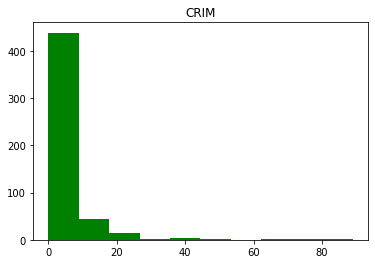

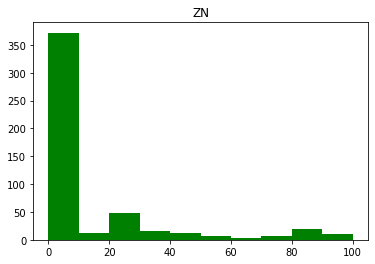

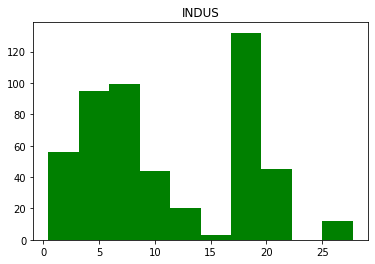

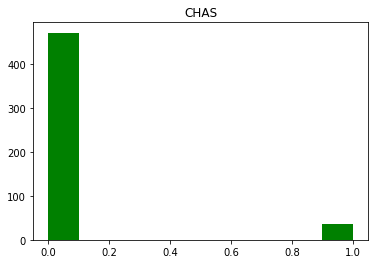

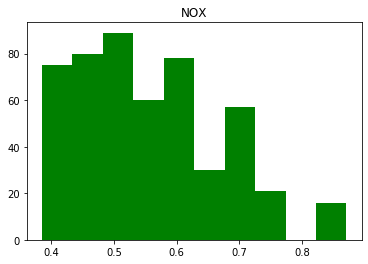

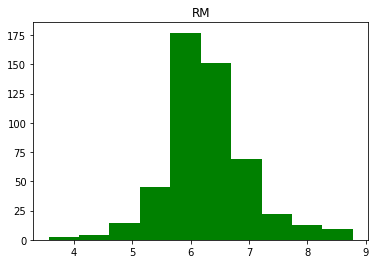

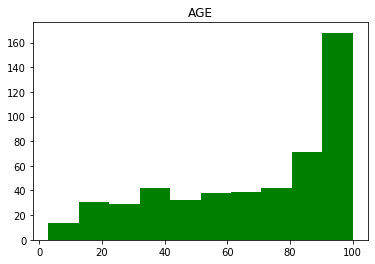

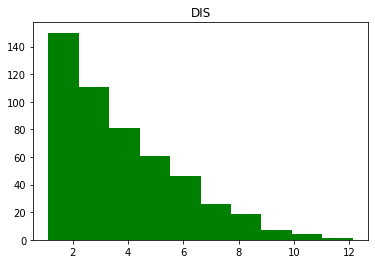

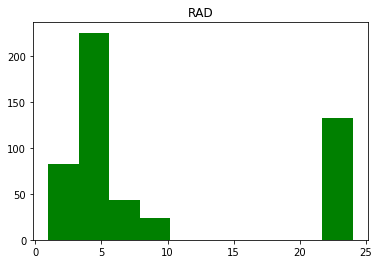

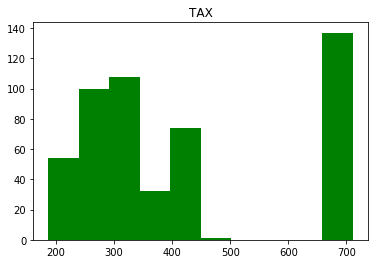

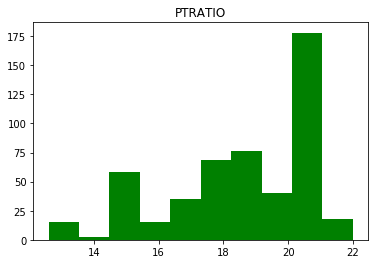

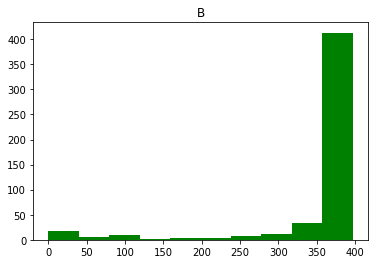

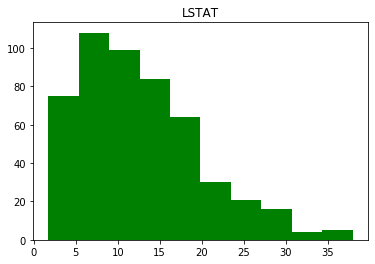

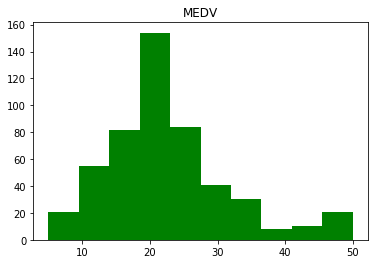

CRIM       None
ZN         None
INDUS      None
CHAS       None
NOX        None
RM         None
AGE        None
DIS        None
RAD        None
TAX        None
PTRATIO    None
B          None
LSTAT      None
MEDV       None
dtype: object

In [9]:
def show_plot(col):
    plt.hist(col, 10, facecolor='g')
    plt.title(col.name)
    plt.show()

data.apply(show_plot)

* Геометрическое - CRIM, ZN, DIS (прям как по учебнику)
* Бернулли - CHAS
* Логнормальное - NOX
* Нормальное - RM
* Равномерное - не замечано
* Биноминальное - MEDV

Написать **линейную регрессию** на два атрибута. Допустим, мы хотим предсказать цену дома (MEDV) в Бостоне, зная что цена на дом имеет линейную зависимость с атрибутом LSTAT. 

In [13]:
# Заполняем пустые значения
data['LSTAT'].fillna(0, inplace = True)
data['MEDV'].fillna(0, inplace = True)

lstat = data['LSTAT']
medv = data['MEDV']

#Решейпим
lstat = np.array(lstat).reshape(-1,1)
medv = np.array(medv).reshape(-1,1)

In [14]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()



1.   Разделить данные на 80% тренировочных, 20% тестовых
2.   Составить модель линейной регрессии
3.   Посчитать ошибку модели на тестовых данных
4.   Сделать точечный график данных и полученной прямой линейной регрессии



In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    lstat,
    medv,
    test_size = 0.2,
    random_state = 3
)

In [17]:
model.fit(X_train, y_train)
predicted_y = model.predict(X_test)
model.score(X_test, y_test)

0.5690773142169758

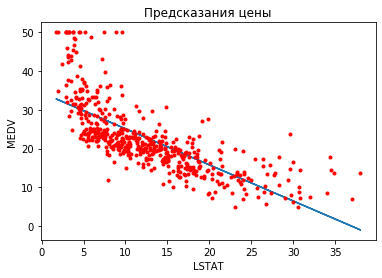

In [20]:
plt.xlabel('LSTAT')
plt.ylabel('MEDV')
plt.title('Предсказания цены')
# Построим прямую для регрессии
x = lstat
# Посчитаем предсказанные значения
y = model.coef_*x + model.intercept_
plt.plot(x,y)

plt.plot(lstat, medv, 'r.')
plt.show()

Загрузить таблицу Happiness report. Посчитать матрицу ковариаций попарно. 

In [21]:
url="http://yustiks.ru/dataset/world-happiness-report-2019.csv"
data=pd.read_csv(url)
data.head()

,Country (region),Ladder,SD of Ladder,Positive affect,Negative affect,Social support,Freedom,Corruption,Generosity,Log of GDP\nper capita,Healthy life\nexpectancy
0,Finland,1,4,41.0,10.0,2.0,5.0,4.0,47.0,22.0,27.0
1,Denmark,2,13,24.0,26.0,4.0,6.0,3.0,22.0,14.0,23.0
2,Norway,3,8,16.0,29.0,3.0,3.0,8.0,11.0,7.0,12.0
3,Iceland,4,9,3.0,3.0,1.0,7.0,45.0,3.0,15.0,13.0
4,Netherlands,5,1,12.0,25.0,15.0,19.0,12.0,7.0,12.0,18.0


In [44]:
val = data.iloc[:,2:]
val.head()

np.round_(np.cov(val.T), decimals=2)

array([[2041.,   nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan],
       [  nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan],
       [  nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan],
       [  nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan],
       [  nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan],
       [  nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan],
       [  nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan],
       [  nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan],
       [  nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan]])

Сколько в данной таблице отсутствующих значений? Написать ответ. Если есть отсутствующие значения в выборке country, убрать (drop). Написать код.

In [50]:
na_count = 0

def na_sum(col):
    global na_count
    for x in col:

        if pd.isna(x) :
            na_count += 1
        
data.apply(na_sum)

print(f'В таблице отсутствует {na_count} значений')

na_country = len(data[data['Country (region)'].isna() == True])

if na_country == 0 :
    print(f'В таблице нет пропущенных стран')
else :
    print(f'В таблице отсутствует {na_country} стран')


В таблице отсутствует 23 значений
В таблице нет пропущенных стран


Сколько стран в выборке? Написать ответ. 

In [51]:
country_count = len(data['Country (region)'].drop_duplicates())
print(f'Количество стран в таблице - {country_count}')

Количество стран в таблице - 156


Добавить новую колонку в таблицу - 'continent'. Каждая страна относится к определенному материку. Всего материко 6:
*   Евразия,
*   Африка,
*   Северная Америка,
*   Южная Америка,
*   Австралия,
*   Антарктида.

Таким образом, мы можем классифицировать каждый элемент как член определенного класса - континента. 

In [61]:
cont = pd.read_csv('continents.csv', ';')
_cont = pd.Series(cont.Continent.values,index=cont.Country).to_dict()

In [62]:
data['continent'] = data['Country (region)'].apply(lambda x: _cont[x])
data.head()

,Country (region),Ladder,SD of Ladder,Positive affect,Negative affect,Social support,Freedom,Corruption,Generosity,Log of GDP\nper capita,Healthy life\nexpectancy,continent
0,Finland,1,4,41.0,10.0,2.0,5.0,4.0,47.0,22.0,27.0,Euroasia
1,Denmark,2,13,24.0,26.0,4.0,6.0,3.0,22.0,14.0,23.0,Euroasia
2,Norway,3,8,16.0,29.0,3.0,3.0,8.0,11.0,7.0,12.0,Euroasia
3,Iceland,4,9,3.0,3.0,1.0,7.0,45.0,3.0,15.0,13.0,Euroasia
4,Netherlands,5,1,12.0,25.0,15.0,19.0,12.0,7.0,12.0,18.0,Euroasia


Нарисовать sns.pairplot для класса - континет. Из графика сделать вывод о том, какие континеты похожи.

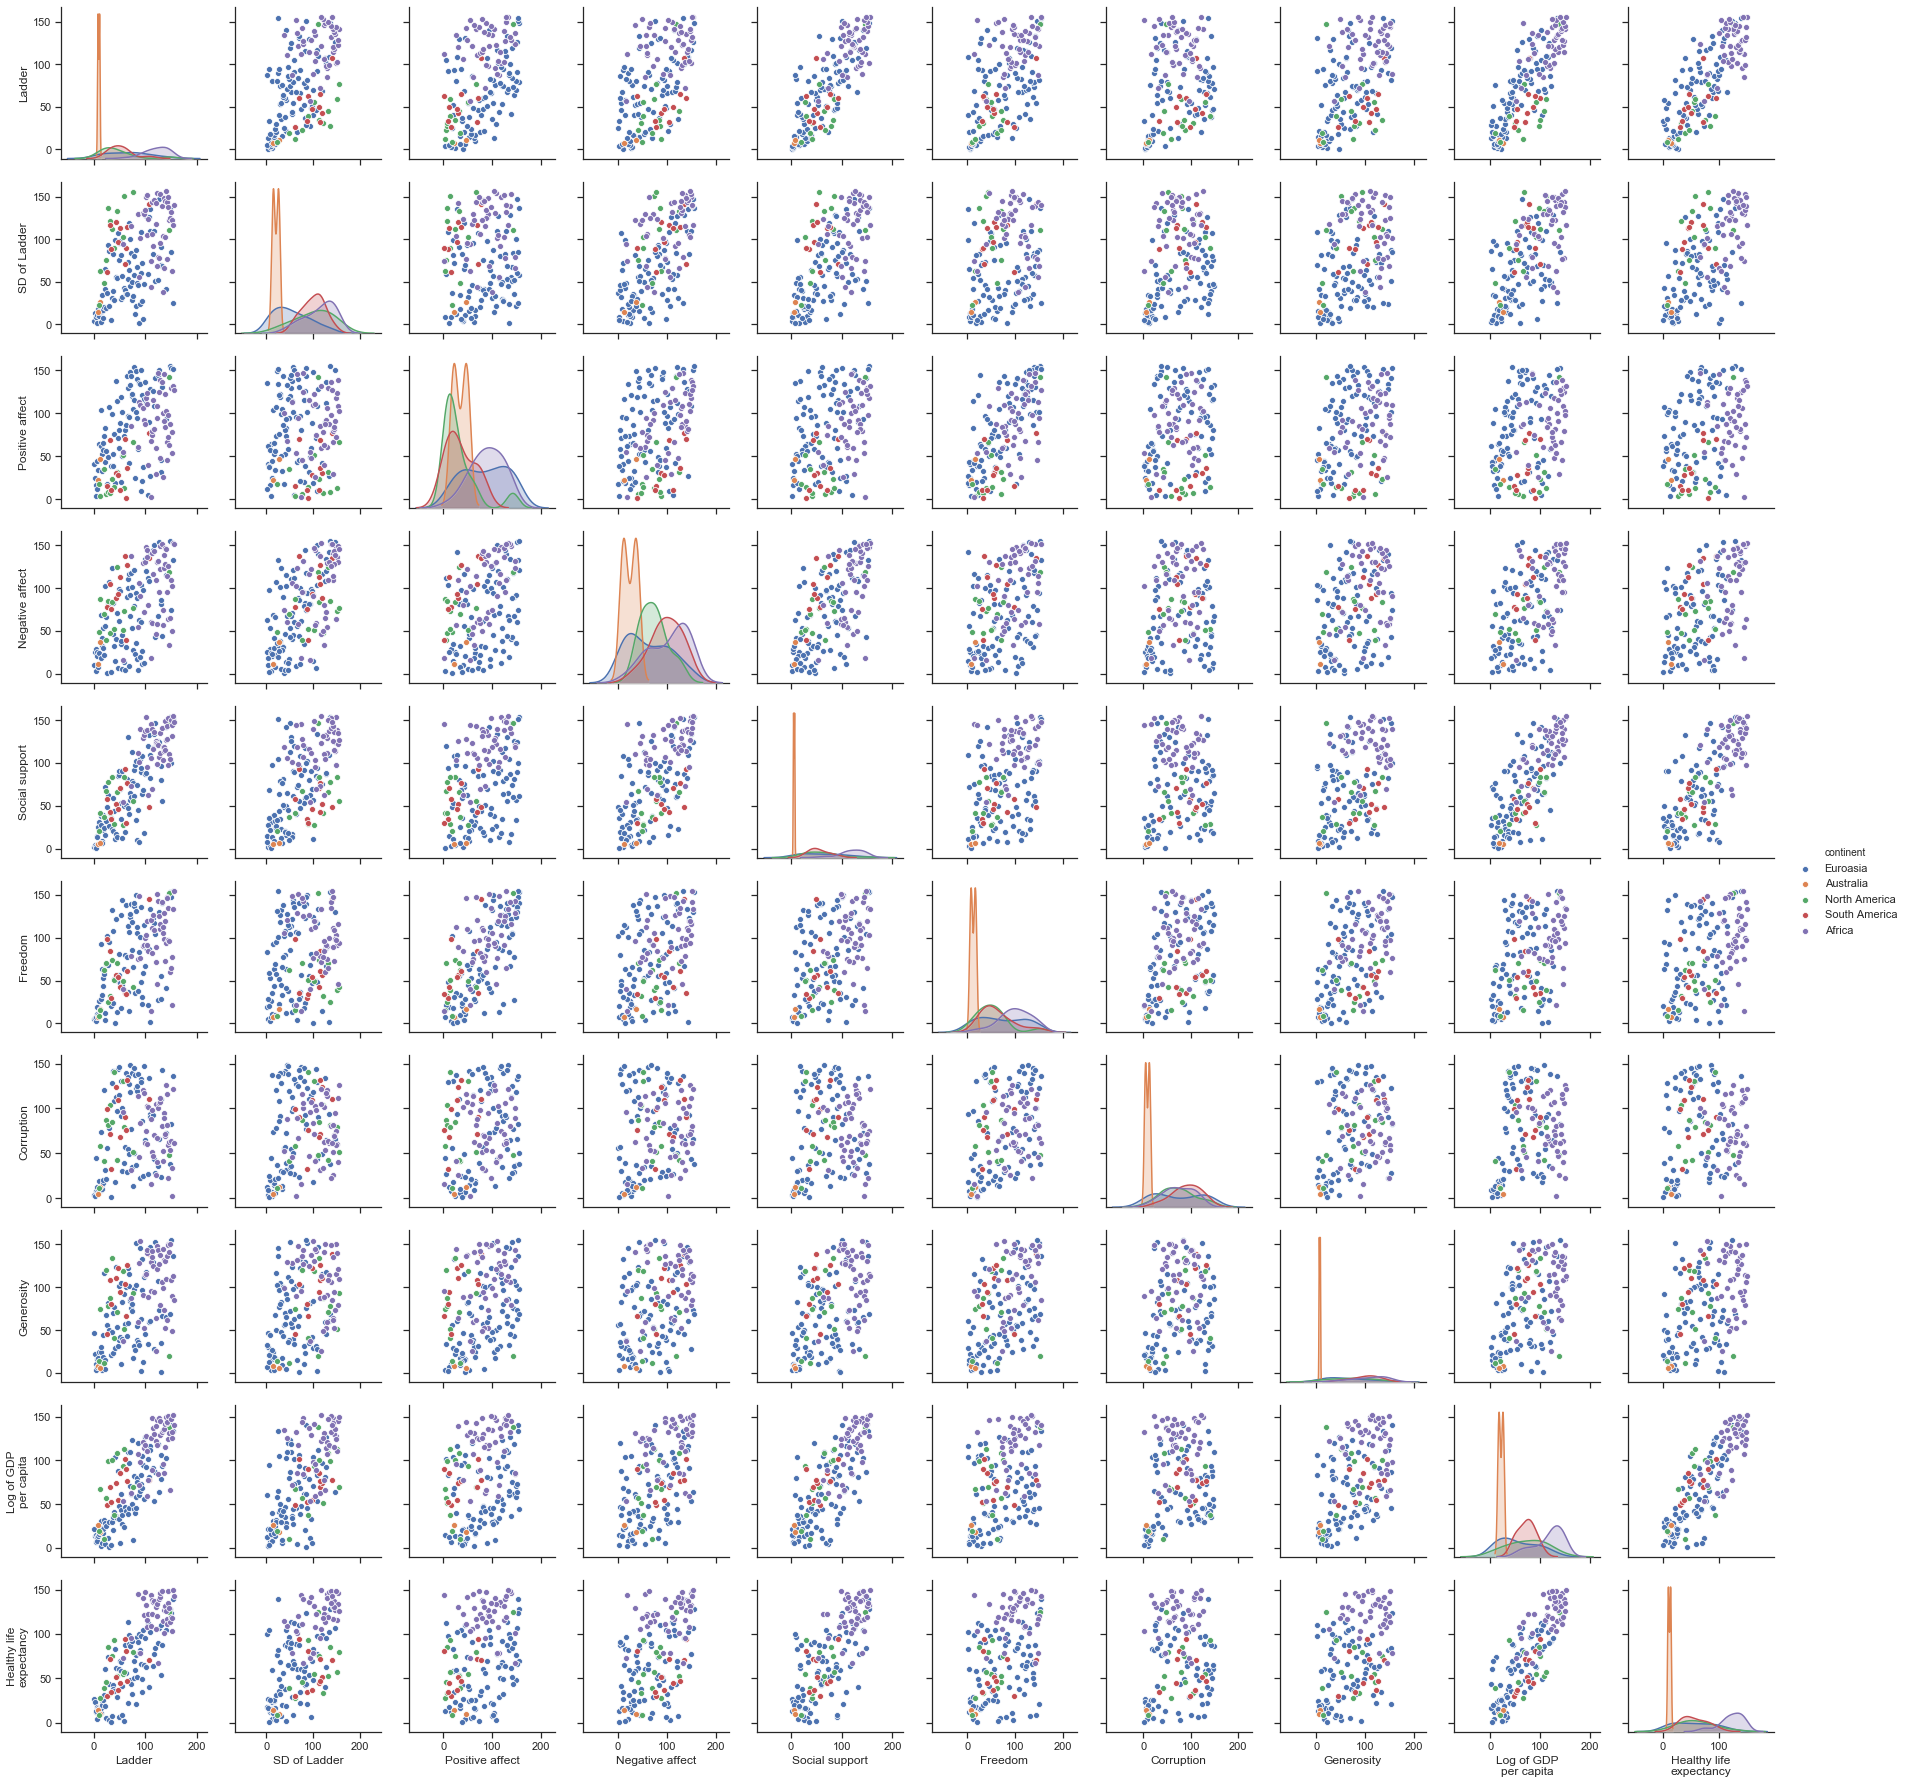

<Figure size 3600x1440 with 0 Axes>

In [74]:
# пример кода на точечный график по континентам
sns.set(style="ticks", color_codes=True)
fig = sns.pairplot(data = data, hue='continent')
plt.figure(figsize=(50, 20))
fig.savefig("output.png")
plt.show()

**Да вообщем-то все континенты более менее похожи, но в то же время все имеют отличия, но кроме конечно Австралии, которая со всем ни на кого не похожа, может быть потому что это континент = одна страна. Так же наиболее похожими мне показались Северная Америка и Южная Америка**

Построить матрицу корреляций для таблицы. Какие можно сделать выводы?

In [75]:
#перед выполнением надо континенты перевести в цифры
continents = {'Euroasia': 1, 'North America': 2, 'South America': 3, 'Africa': 4, 'Australia': 5 }

data['continent'] = data['continent'].apply(lambda x: continents[x]) 

In [78]:
data.groupby('continent').mean()

,Ladder,SD of Ladder,Positive affect,Negative affect,Social support,Freedom,Corruption,Generosity,Log of GDP\nper capita,Healthy life\nexpectancy
continent,,,,,,,,,,
1,65.325581,55.011628,84.952941,63.917647,62.541176,73.047059,74.166667,62.329412,56.168675,56.333333
2,44.538462,101.538462,32.153846,73.846154,59.692308,53.307692,74.000000,70.461538,74.000000,59.769231
3,52.800000,101.100000,34.700000,99.200000,55.400000,63.900000,91.300000,99.800000,73.100000,56.300000
4,122.266667,114.288889,89.666667,103.466667,120.711111,100.533333,74.400000,108.088889,118.840909,122.681818
5,9.500000,20.500000,34.500000,24.500000,6.000000,12.500000,9.000000,7.000000,22.000000,12.000000


In [77]:
np.round_(data.corr(), decimals=2)

,Ladder,SD of Ladder,Positive affect,Negative affect,Social support,Freedom,Corruption,Generosity,Log of GDP\nper capita,Healthy life\nexpectancy,continent
Ladder,1.00,0.54,0.49,0.52,0.82,0.55,0.19,0.50,0.81,0.82,0.46
SD of Ladder,0.54,1.00,0.09,0.62,0.60,0.25,0.26,0.39,0.63,0.61,0.53
Positive affect,0.49,0.09,1.00,0.39,0.39,0.68,0.21,0.35,0.30,0.33,-0.02
Negative affect,0.52,0.62,0.39,1.00,0.62,0.43,0.16,0.34,0.54,0.49,0.36
Social support,0.82,0.60,0.39,0.62,1.00,0.45,0.12,0.44,0.77,0.74,0.47
Freedom,0.55,0.25,0.68,0.43,0.45,1.00,0.38,0.49,0.41,0.42,0.20
Corruption,0.19,0.26,0.21,0.16,0.12,0.38,1.00,0.27,0.20,0.12,-0.02
Generosity,0.50,0.39,0.35,0.34,0.44,0.49,0.27,1.00,0.48,0.43,0.40
Log of GDP\nper capita,0.81,0.63,0.30,0.54,0.77,0.41,0.20,0.48,1.00,0.85,0.55
Healthy life\nexpectancy,0.82,0.61,0.33,0.49,0.74,0.42,0.12,0.43,0.85,1.00,0.58


Слабо я понимаю, что ответить на 0.5 значения, это типа наполовину зависит? Ну вот коррупция и позитивный эффект не зависит от континента, остальные зависят, наполовину?

**Регрессионный анализ** - можно ли провести линейную зависимость между двумя выборками. Возьмем Ladder - удовлетворение жизнью, и generosity - доброта. Мы хотим найти прямую, которая разделит точки в пространстве наполовину. Это можно сделать графически. Нарисовать график. Можно ли сказать, что данная прямая является собственным вектором? Сделать график регрессионной прямой на данных и собственных векторов. 

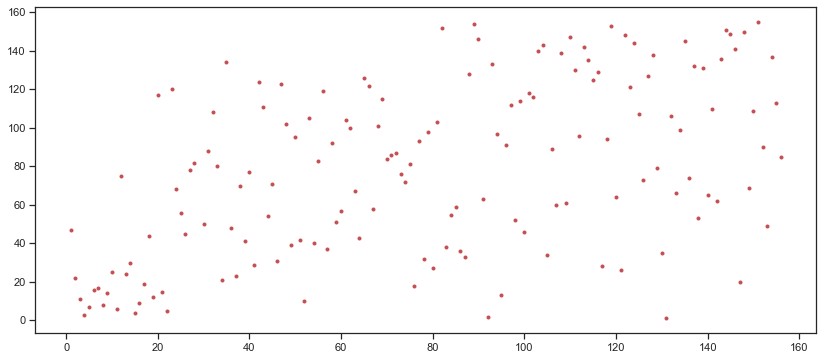

In [85]:
plt.plot(data['Ladder'], data['Generosity'], 'r.')
fig=plt.gcf()
fig.set_size_inches(14,6)
plt.show()

In [101]:
# Заполняем пустые значения
data['Ladder'].fillna(0, inplace = True)
data['Generosity'].fillna(0, inplace = True)

ladder = data['Ladder']
genor = data['Generosity']

#Решейпим
ladder = np.array(ladder).reshape(-1,1)
genor = np.array(genor).reshape(-1,1)

In [102]:
model = LinearRegression()

X_train, X_test, y_train, y_test = train_test_split(
    genor,
    ladder,
    test_size = 0.2,
    random_state = 3
)

model.fit(X_train, y_train)
predicted_y = model.predict(X_test)
model.score(X_test, y_test)

0.33472790762630467

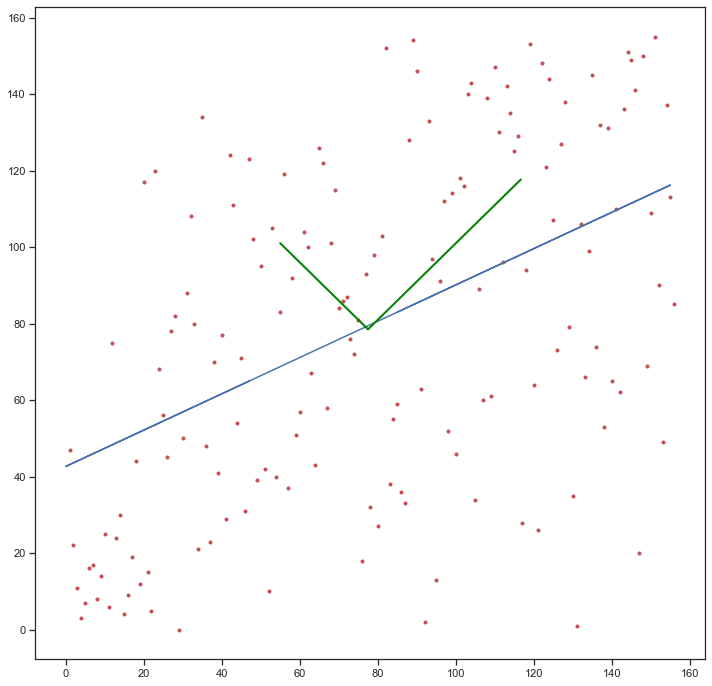

In [162]:
plt.plot(ladder, genor, 'r.')
fig=plt.gcf()
fig.set_size_inches(12,12)

# Построим прямую для регрессии
x = genor
# Посчитаем предсказанные значения
y = model.coef_*x + model.intercept_
plt.plot(x,y)

import numpy.linalg as la
import math
from sklearn.preprocessing import StandardScaler

Y = np.concatenate((ladder, genor), axis = 1).T
w,v = la.eig(np.cov(Y))

for i in range(len(w)):
    plt.plot([genor.mean(), genor.mean() + math.sqrt(w[i]) * v[:,i][0]], 
             [ladder.mean(), ladder.mean() + math.sqrt(w[i]) * v[:,i][1]], color='green', linewidth=2)


plt.show()

[1 3]


**Как видно линейная модель не совпадает с собственным вектором**

# Дискретное распределение случайной величины

Напишите код для моделирования 10 подбрасываний игрального кубика. Начертите диаграму histogram. Какое это распределение?

In [92]:
import random

def cube():
    return random.randint(1, 6)

In [93]:
cube_set = []

for x in range(10):
    cube_set.append(cube())

cube_set

[4, 3, 2, 3, 2, 3, 6, 6, 3, 5]

(array([2., 4., 0., 1., 1., 2.]),
 array([2.        , 2.66666667, 3.33333333, 4.        , 4.66666667,
        5.33333333, 6.        ]),
 <a list of 6 Patch objects>)

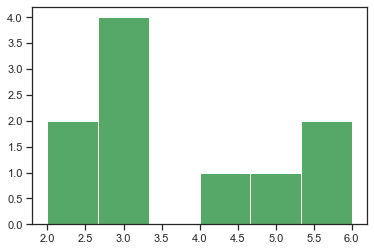

In [95]:
plt.hist(cube_set, 6, facecolor='g')

**Похоже на логнормальное распределение** Если бы побольше кинули было бы равномерное распределение

моделируйте 1000 раз сумму по 100 подбрасываний. Начертите диаграму histogram. Почему график изменился? Почему можно применить центральную предельную теорему?

In [163]:
cube_set = []

for x in range(1000) :
    sum = 0
    for j in range(100) :
        sum += cube()
        
    cube_set.append(sum)

(array([  3.,   4.,  12.,  24.,  42.,  69.,  89., 113., 137., 140., 148.,
         86.,  53.,  45.,  21.,   7.,   5.,   1.,   0.,   1.]),
 array([296. , 302.1, 308.2, 314.3, 320.4, 326.5, 332.6, 338.7, 344.8,
        350.9, 357. , 363.1, 369.2, 375.3, 381.4, 387.5, 393.6, 399.7,
        405.8, 411.9, 418. ]),
 <a list of 20 Patch objects>)

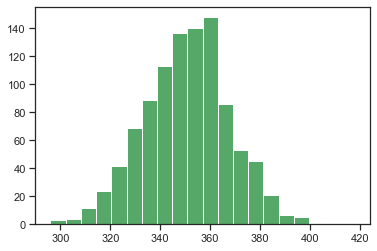

In [164]:
plt.hist(cube_set, 20, facecolor='g')

**Получилось практически нормальное распределение (немного смешено вправо)** График изменился, потому что мы бросили достаточно много раз. А как гласит центральная предельная теорема, если мы возьмем сумму достаточно большого количества несвязаннх случайных величин, то мы получим нормальное распределение. На то оно видимо и нормальное :) 